# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

In [1]:
# importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# leer conjuntos de datos en los DataFrames
aisles_df = pd.read_csv('aisles.csv', sep=';')
departments_df = pd.read_csv('departments.csv',sep=';')
instacart_orders_df = pd.read_csv('instacart_orders.csv', sep=';')
products_df = pd.read_csv('products.csv', sep=';')
order_products_df = pd.read_csv('order_products.csv', sep=';')

In [3]:
# mostrar información del DataFrame

aisles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [4]:
# mostrar información del DataFrame
departments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [5]:
# mostrar información del DataFrame
instacart_orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [6]:
# mostrar información del DataFrame
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [7]:
# mostrar información del DataFrame
order_products_df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


## Conclusiones

#### Observé que todos los conjuntos de datos contenían una columna. Al analizar cómo estaban separados los datos, llegué a la conclusión de que estaban delimitados por ';'. Por lo tanto, simplemente agregué el argumento 'sep =';' a cada llamada de pd.read_csv() para poder estudiar adecuadamente la información de cada conjunto de datos.

#### Posteriormente, me llamo la atencion 'instacard_orders' puesto que tiene una columna con bastantes valores ausentes 'days_since_prior_order' esto puede ser debido a que esas ordenes acaban de ser realizada. En 'products_df' tiene en la columna  'product_name' datos nulos y por ultimo en order_products_df, la columna 'add_to_cart_order' tambien tiene datos nulos ademas de que es un tipo float

# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

### Primer punto: Verificación y conversión del tipo de dato

- Utilizar el método `.dtype()` para verificar si los datos son del tipo requerido, en este caso, 'int'.
- Si la columna no tiene el tipo de dato correcto, utilizar el método `.astype()` para convertirla al tipo adecuado.

### Segundo punto: Tratamiento de datos ausentes

- Utilizar los métodos `.fillna()` e `.isna()` para identificar y reemplazar los datos ausentes en el DataFrame.
- `fillna()` se usará para rellenar los valores faltantes.
- `isna()` ayudará a identificar dónde están ubicados los datos ausentes en primer lugar.

### Tercer punto: Eliminación de duplicados

- Utilizar los métodos `.duplicates()` y `.drop_duplicates()` para identificar y eliminar duplicados en el DataFrame, respectivamente.
- Esto garantizará que los datos estén libres de duplicados y que no haya redundancia en la información.

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [8]:
# Revisa si hay pedidos duplicados

subset='order_id'
pedidos_duplicados = instacart_orders_df.duplicated(subset='order_id')

# Contar la cantidad de pedidos duplicados
cantidad_pedidos_duplicados = pedidos_duplicados.sum()

if cantidad_pedidos_duplicados > 0:
    print("Hay", cantidad_pedidos_duplicados, "pedidos duplicados.")
    # Muestra las filas duplicadas
    print("Filas duplicadas:")
    print(instacart_orders_df[pedidos_duplicados])
else:
    print("No se encontraron pedidos duplicados.")

Hay 15 pedidos duplicados.
Filas duplicadas:
        order_id  user_id  order_number  order_dow  order_hour_of_day  \
145574    794638    50898            24          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
266232   1782114   106752             1          3                  2   
273805   1112182   202304            84          3                  2   
284038   2845099    31189            11          3                  2   
311713   1021560    53767             3          3                  2   
321100    408114    68324             4          3                  2   
323900   1919531   191501            32          3                  2   
345917   2232988    82565             1          3                  2   
371905    391768    57671            19          3                  2   
394347    467134    63189            21          3                  2   
411408

Durante el análisis de duplicados, se encontraron 15 pedidos duplicados al considerar tanto la columna 'user_id' de manera exclusiva como al realizar el análisis sin esta distinción. Este descubrimiento reafirma la singularidad del identificador de usuario asociado a cada pedido en nuestro conjunto de datos.

Este resultado sugiere que cada usuario posee un ID único en nuestra base de datos de pedidos. La detección de duplicados al considerar solo el 'user_id' indica que no existen usuarios con el mismo ID registrado en nuestros datos. Además, la presencia de duplicados sin la especificación de una distinción de columnas implica que algunos pedidos son completamente idénticos, lo que refuerza la idea de que cada pedido está vinculado de manera exclusiva a un único usuario.

In [9]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.

day_hour_filter = instacart_orders_df.query('(order_dow == 3) & (order_hour_of_day == 2)')

print(day_hour_filter)

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838     2766110   162084            41          3                  2   
5156     2190225   138285            18          3                  2   
15506     553049    58599            13          3                  2   
18420     382357   120200            19          3                  2   
24691     690242    77357             2          3                  2   
...          ...      ...           ...        ...                ...   
457013   3384021    14881             6          3                  2   
458816    910166   164782            18          3                  2   
459635   1680532   106435             6          3                  2   
468324    222962    54979            59          3                  2   
477526   2592344    46860            38          3                  2   

        days_since_prior_order  
4838                      16.0  
5156                      11.0  
15506                   

Es notable que todos los pedidos duplicados identificados estén concentrados en el mismo día y hora: miércoles a las 2:00 a.m. Este patrón sugiere la posibilidad de que en ese momento se haya producido un pico significativo en las compras, y los duplicados podrían haber surgido como resultado de algún error en el sistema o proceso de registro de pedidos. 

In [10]:
# Elimina los pedidos duplicados
instacart_orders_df = instacart_orders_df.drop_duplicates().reset_index(drop=True)

In [11]:
# Vuelve a verificar si hay filas duplicadas

instacart_orders_df.duplicated().sum()

0

In [12]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
print(instacart_orders_df['order_id'].duplicated().sum())

0


Se vio que efectivamente, basandonos en 'order_id' podiamos ver que el numero de duplicados es el mismo, '15'

### `products` data frame

In [13]:
# Verifica si hay filas totalmente duplicadas

filas_duplicadas = products_df.duplicated().sum()

if filas_duplicadas > 0:
    print('Hay', filas_duplicadas, 'productos duplicados')
elif filas_duplicadas == 0:
    print('No hay productos duplicados')

No hay productos duplicados


In [14]:
# Revisa únicamente si hay ID de departamentos duplicados
id_duplicadas = products_df['department_id'].duplicated().sum()

if id_duplicadas > 0:
    print('Hay', id_duplicadas, 'id de departamento duplicados')
elif id_duplicadas == 0:
    print('No hay id de departamento duplicados')

Hay 49673 id de departamento duplicados


In [15]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
nombres_duplicados = products_df['product_name'].str.upper().duplicated().sum()

if nombres_duplicados > 0:
    print('Hay', nombres_duplicados, 'nombres duplicados')
elif nombres_duplicados == 0:
    print('No hay nombres duplicados')

Hay 1361 nombres duplicados


In [16]:
# Revisa si hay nombres duplicados de productos no faltantes

productos_sin_faltantes = products_df['product_name'].dropna().str.upper()

nombres_duplicados = productos_sin_faltantes.duplicated().sum()

if nombres_duplicados > 0:
    print('Hay', nombres_duplicados, 'nombres duplicados')
elif nombres_duplicados == 0:
    print('No hay nombres duplicados')

Hay 104 nombres duplicados


Al analizar el DataFrame Products_csv, se observa que no existen filas completamente duplicadas. Sin embargo, se encontraron 49,673 identificadores de departamento duplicados, lo cual es coherente ya que cada departamento debe tener un único identificador.

Además, se identificaron 1,361 nombres duplicados de productos. Sin embargo, al examinar duplicados de nombres sin datos faltantes, esta cifra disminuyó significativamente a 104 nombres duplicados. Esto sugiere que hay una cantidad considerable de filas sin nombre de producto en el conjunto de datos.



### `departments` data frame

In [17]:
# Revisa si hay filas totalmente duplicadas
filas_duplicadas_departments = products_df.duplicated().sum()

if filas_duplicadas_departments > 0:
    print('Hay', filas_duplicadas_departments, 'filas duplicados')
elif filas_duplicadas_departments == 0:
    print('No hay filas duplicadas')

No hay filas duplicadas


In [18]:
# Revisa únicamente si hay IDs duplicadas de productos
id_duplicadas = departments_df['department_id'].duplicated().sum()

if id_duplicadas > 0:
    print('Hay', id_duplicadas, 'id de departamento duplicados')
elif id_duplicadas == 0:
    print('No hay id de departamento duplicados')


No hay id de departamento duplicados


No hay duplicados pues es un dataframe creado con la finalidad de guardar nombre id de departamento unicamente, por lo tanto es normal la ausencia de duplicados 

### `aisles` data frame

In [19]:
# Revisa si hay filas totalmente duplicadas
filas_aisles_duplicadas = aisles_df.duplicated().sum()

if filas_aisles_duplicadas > 0:
    print('Hay', filas_aisles_duplicadas, 'filas duplicadas')
elif filas_aisles_duplicadas == 0:
    print('No hay filas duplicadas')

No hay filas duplicadas


In [20]:
# Revisa únicamente si hay IDs duplicadas de productos
id_duplicadas = aisles_df['aisle_id'].duplicated().sum()

if id_duplicadas > 0:
    print('Hay', id_duplicadas, 'id de departamento duplicados')
elif id_duplicadas == 0:
    print('No hay id de departamento duplicados')


No hay id de departamento duplicados


Similar a lo que paso con apartments, no hay ni duplicados por fila completa ni basandonos unicamente en el id del producto, por que es un dataset hecho para etiquetar ciertos productos por id.

### `order_products` data frame

In [21]:
# Revisa si hay filas totalmente duplicadas
filas_order_products_duplicadas = order_products_df.duplicated().sum()

if filas_order_products_duplicadas > 0:
    print('Hay', filas_order_products_duplicadas, 'filas duplicadas')
elif filas_order_products_duplicadas == 0:
    print('No hay filas duplicadas')


No hay filas duplicadas


In [22]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso

# Verifica el número de filas antes de eliminar duplicados
rows_before = order_products_df.shape[0]

# Elimina los duplicados basados en todas las columnas del DataFrame
order_products_df.drop_duplicates(inplace=True)

# Verifica el número de filas después de eliminar duplicados
rows_after = order_products_df.shape[0]

# Calcula la diferencia en el número de filas
duplicates_removed = rows_before - rows_after

if duplicates_removed == 0:
    print("No se encontraron duplicados engañosos en el DataFrame order_products.")
else:
    print(f"Se eliminaron {duplicates_removed} duplicados engañosos del DataFrame order_products.")



No se encontraron duplicados engañosos en el DataFrame order_products.


In [23]:
# Encuentra las filas duplicadas basadas en 'order_id'
duplicated_rows_order_id = order_products_df[order_products_df['order_id'].duplicated()]
# Selecciona 10 filas aleatorias de los registros duplicados basados en 'order_id'
sampled_duplicates_order_id = duplicated_rows_order_id.sample(n=5)

print("Duplicados basados en 'order_id':")
print(sampled_duplicates_order_id)
print()

# Encuentra las filas duplicadas basadas en 'product_id'
duplicated_rows_product_id = order_products_df[order_products_df['product_id'].duplicated()]
# Selecciona 10 filas aleatorias de los registros duplicados basados en 'product_id'
sampled_duplicates_product_id = duplicated_rows_product_id.sample(n=5)

print("Duplicados basados en 'product_id':")
print(sampled_duplicates_product_id)
print()

# Elimina duplicados en 'order_id' y 'product_id' y asigna el resultado a order_products_df
order_products_df = order_products_df.drop_duplicates(subset=['order_id', 'product_id'])


order_products_df.info()



Duplicados basados en 'order_id':
         order_id  product_id  add_to_cart_order  reordered
150017     852330       15891               16.0          0
4359230   2880060         162                9.0          1
2852195   1754208       33401                8.0          0
987456     181457       40174                3.0          1
1683484   2210175       25952                4.0          1

Duplicados basados en 'product_id':
         order_id  product_id  add_to_cart_order  reordered
3881871   2651656       19171                9.0          1
3978342   1921111       30321               13.0          0
3429588   2116864       43355               17.0          0
1338678    489443       47766               21.0          1
2893282    847566       44359                6.0          1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  



En teoría, no deberían existir duplicados completos en las filas del DataFrame 'order_products'. Sin embargo, al realizar pruebas específicamente con la columna 'order_id', se encontraron duplicados, lo cual es notable ya que se espera que cada ID sea único. Lo mismo sucede con la columna 'product_id'. Por lo tanto, opté por eliminar los duplicados basados en esta última columna, lo que resultó en la eliminación de varias filas. Aunque la cantidad de filas eliminadas fue relativamente baja en comparación con el tamaño total del DataFrame, este hallazgo es significativo en términos de la integridad de los datos y la consistencia esperada en las IDs de pedidos y productos.

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [24]:
# Encuentra los valores ausentes en la columna 'product_name'

na_products = products_df['product_name'].isna().sum()

print('Hay', na_products, 'nombres de productos ausentes')

Hay 1258 nombres de productos ausentes


Hay 1258 valores ausentes en la columna

In [25]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
print(products_df[products_df['product_name'].isna()].sample(n=15))

       product_id product_name  aisle_id  department_id
12057       12058          NaN       100             21
5306         5307          NaN       100             21
27633       27634          NaN       100             21
40983       40984          NaN       100             21
33264       33265          NaN       100             21
30669       30670          NaN       100             21
9658         9659          NaN       100             21
39170       39171          NaN       100             21
21504       21505          NaN       100             21
22751       22752          NaN       100             21
14794       14795          NaN       100             21
12980       12981          NaN       100             21
12371       12372          NaN       100             21
21480       21481          NaN       100             21
29906       29907          NaN       100             21


Por lo visto tanto la id del departamento como la id de el pasillo son identicas, '21' y '100' respectivamente, puede ser debido a que un producto en concreto no fue registrado fue comprado 1258 veces

In [26]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?

print(products_df['department_id'][products_df['product_name'].isna()].sample(n=15))



5936     21
12738    21
2979     21
19480    21
11666    21
36386    21
3356     21
23393    21
36171    21
6727     21
35709    21
25249    21
11245    21
6581     21
44793    21
Name: department_id, dtype: int64


Efectivamente el id de departamento es 21

In [27]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.

filtered_data = departments_df.query('department_id == 21') 
filtered_data_2 = aisles_df.query('aisle_id == 100') 

print(filtered_data.head())
print()
print(filtered_data_2.head())


    department_id department
20             21    missing

    aisle_id    aisle
99       100  missing


En efecto, department_id es un valor no registrado asi como aisle_id, cuando valen '21' y '100' respectivamente 

In [28]:
# Completa los nombres de productos ausentes con 'Unknown'
products_df['product_name'] = products_df['product_name'].fillna('Unknown')

print(products_df['product_name'].isna().sum())

0


Se cambiaron los valores del producto ausente

### `orders` data frame

In [29]:
# Encuentra los valores ausentes

instacart_orders_df.isna().sum()

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64

In [30]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?

diferente_1er_pedido = instacart_orders_df[instacart_orders_df['order_number'] != 1]

diferente_1er_pedido.isna().sum()




order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64


Se puede observar que al excluir los primeros pedidos en la columna 'days_since_prior_order', se encuentran 28,817 valores nulos. Esto se debe a que estos valores nulos representan casos donde los clientes han realizado su primera compra. Por lo tanto, no hay un valor previo para estos clientes, lo que resulta en valores nulos en esas filas.

### `order_products` data frame

In [31]:
# Encuentra los valores ausentes

order_products_df.isna().sum()

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [32]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?

print('máximo: ')
print(order_products_df['add_to_cart_order'].max())
print()
print('minimo: ')
print(order_products_df['add_to_cart_order'].min())


print(order_products_df[order_products_df['add_to_cart_order'].isna()].sample(n=10))

máximo: 
64.0

minimo: 
1.0
         order_id  product_id  add_to_cart_order  reordered
3536441    871281       47087                NaN          1
3512834   1386261       27772                NaN          0
814253    2926893        1208                NaN          0
1463117   1038146       46505                NaN          0
4210154   2409109       21795                NaN          0
2126292   1730767       24265                NaN          1
4063159     61355        1087                NaN          0
464703     171934        5652                NaN          0
1601892   1800005        7622                NaN          0
1151056   2256933       40724                NaN          0


Observo que hay un registro incompleto de datos puesto que no encuentro alguna relacion entra las filas con NaN en la columna 'add_to_card_order' 

In [33]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'

id_nas = order_products_df[order_products_df['add_to_cart_order'].isna()]['order_id']

ids_pedidos_con_na_lista = id_nas.tolist()
print(ids_pedidos_con_na_lista)


[2449164, 1968313, 2926893, 1717990, 1959075, 844733, 61355, 936852, 264710, 1717990, 1564093, 129627, 264710, 293169, 2849370, 1386261, 3308010, 903110, 2136777, 3347453, 1888628, 165801, 2449164, 2094761, 3347453, 1038146, 2136777, 2997021, 844733, 844733, 2136777, 813364, 165801, 2256933, 171934, 264710, 2449164, 2409109, 3347453, 813364, 2926893, 936852, 1730767, 1169835, 733526, 844733, 293169, 61355, 903110, 1968313, 733526, 2136777, 2926893, 404157, 1386261, 171934, 3125735, 747668, 3308010, 1169835, 1800005, 1961723, 936852, 2849370, 3308010, 61355, 871281, 1717990, 813364, 388234, 61355, 3125735, 1959075, 61355, 3125735, 1648217, 171934, 3125735, 61355, 1477139, 1959075, 1717990, 1717990, 61355, 1717990, 171934, 1038146, 3308010, 3347453, 102236, 936852, 171934, 1730767, 2926893, 1021563, 1832957, 1959075, 2256933, 1968313, 2721963, 293169, 102236, 3125735, 1959075, 264710, 678116, 1220886, 1386261, 171934, 1959075, 61355, 3308010, 61355, 102236, 388234, 171934, 3308010, 19617

In [34]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Verificar si todos los pedidos con valores ausentes tienen más de 64 productos
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.


filtro = order_products_df[order_products_df['order_id'].isin(ids_pedidos_con_na_lista)]

filtro_64 = filtro.groupby('order_id')['product_id'].count()

print(filtro_64)
print()
print(filtro_64.min())


order_id
9310        65
61355      127
102236      95
129627      69
165801      70
          ... 
2999801     70
3125735     86
3308010    115
3347453     71
3383594     69
Name: product_id, Length: 70, dtype: int64

65


Se descubrio que el numero de productos siempre es superior a 65 para las filas que tienen 'NaN' en sus columnas 'add_to_cart_order'

In [35]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.

order_products_df['add_to_cart_order'].fillna(999, inplace=True)

order_products_df['add_to_cart_order'] = order_products_df['add_to_cart_order'].astype('int')

print(order_products_df)


         order_id  product_id  add_to_cart_order  reordered
0         2141543       11440                 17          0
1          567889        1560                  1          1
2         2261212       26683                  1          1
3          491251        8670                 35          1
4         2571142        1940                  5          1
...           ...         ...                ...        ...
4545002    577211       15290                 12          1
4545003   1219554       21914                  9          0
4545004    692640       47766                  4          1
4545005    319435         691                  8          1
4545006   1398151       28733                  9          0

[4545007 rows x 4 columns]


C:\Users\evolu_s6am3bc\AppData\Local\Temp\ipykernel_2076\2037129373.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  order_products_df['add_to_cart_order'].fillna(999, inplace=True)


use fillna() para rellenar los na con 999 ademas de astype() para cambiar el tipo de dato de float a int y por ultimo imprimi. Ya no hay datos NaN en la columna

## Conclusiones

## Conclusiones Intermedias - Paso 2: Preprocesamiento de los Datos

1. **Valores Ausentes:**
   - Se encontraron valores ausentes en las columnas `'days_since_prior_order'` y `'add_to_cart_order'`.
   - Los valores nulos en `'days_since_prior_order'` corresponden a los primeros pedidos de cada cliente, lo que indica que son nuevos en la plataforma.
   - Los valores nulos en `'add_to_cart_order'` parecen corresponder a pedidos con más de 64 productos.

2. **Duplicados:**
   - Se identificaron pedidos duplicados en el DataFrame `instacart_orders_df`.
   - En `'order_products'` se eliminaron duplicados en 'order_id' y 'product_id'

3. **Tipo de Datos:**
   - Se convirtió la columna `'add_to_cart_order'` de tipo float a tipo int para facilitar el análisis.

4. **Problemas de Formato:**
   - Se rellenaron los valores nulos en la columna `'product_name'` del DataFrame `products_df` con 'Unknown'.







# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [36]:
# 1
check_1 = instacart_orders_df['order_hour_of_day'].max() #Chqueo de la primera columna
print()
check_2 = instacart_orders_df['order_hour_of_day'].min() 

if check_1 == 23 and check_2 == 0:
    print('Si esta en el rango apropiado')
else:
    print('No esta en el rango apropiado')



Si esta en el rango apropiado


In [37]:
#Chqueo de la segunda columna
check_1 = instacart_orders_df['order_dow'].max() 
print()
check_2 = instacart_orders_df['order_dow'].min()

if check_1 == 6 and check_2 == 0:
    print('Si esta en el rango apropiado')
else:
    print('No esta en el rango apropiado')


Si esta en el rango apropiado


Escribe aquí tus conclusiones

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

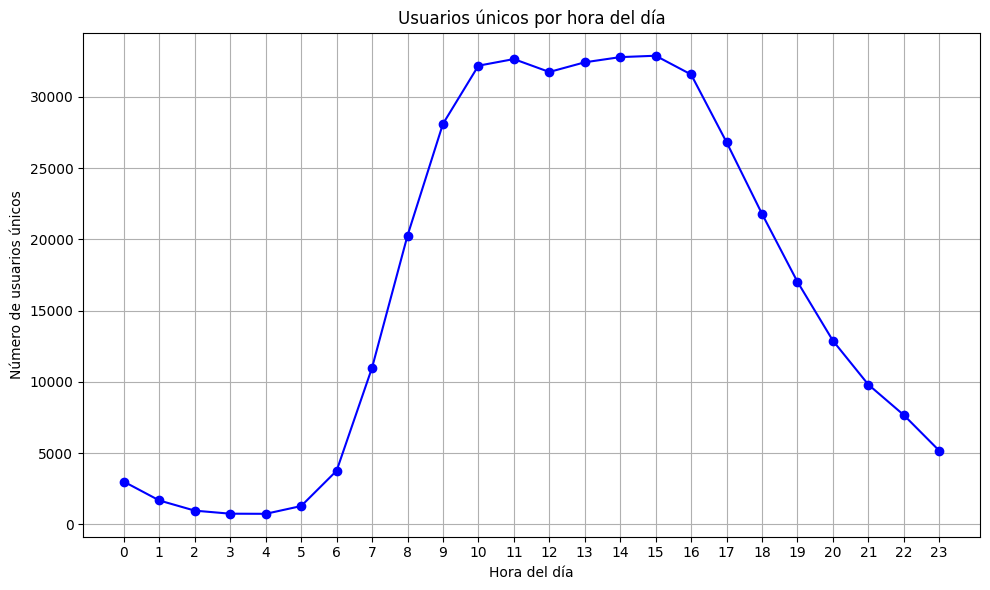

In [38]:
# 2
# X = 'order_hour_of_day'
# Y = 'user_id'
x_value = instacart_orders_df['order_hour_of_day'].unique()
x_value_sorted = sorted(x_value)


y_value = instacart_orders_df.groupby('order_hour_of_day')['user_id'].nunique()
value_y_list = y_value.tolist()


plt.figure(figsize=(10, 6))  # Tamaño del gráfico
plt.plot(x_value_sorted, value_y_list, marker='o', linestyle='-', color='b')  # Estilo de línea y marcadores
plt.xlabel('Hora del día')  # Etiqueta del eje x
plt.ylabel('Número de usuarios únicos')  # Etiqueta del eje y
plt.title('Usuarios únicos por hora del día')  # Título del gráfico
plt.grid(True)  # Activar cuadrícula
plt.xticks(range(24))  # Definir los valores del eje x como las 24 horas del día
plt.tight_layout()  # Ajustar el diseño para que se ajuste correctamente
plt.show()


Basándonos en los datos disponibles, podemos observar que entre las 10 y las 16 horas es la hora pico de clientes únicos. También se aprecia un aumento significativo en la captación de clientes a partir de las 5 horas. Sin embargo, a las 17 horas comienza a ocurrir lo contrario, con una disminución en la afluencia de clientes.

### [A3] ¿Qué día de la semana compran víveres las personas?

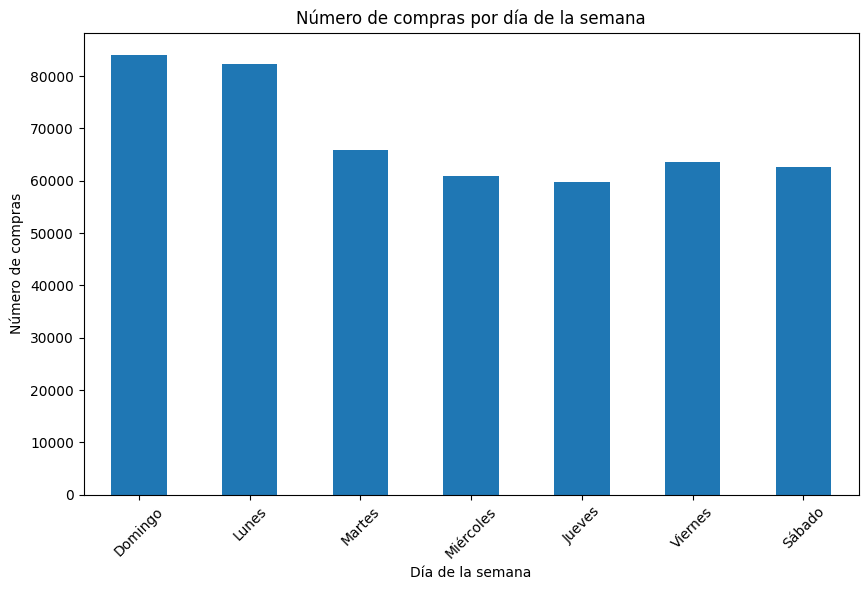

In [39]:
# x = 'order_dow'

instacart_orders_df['order_dow'].value_counts().sort_index().plot(kind='bar', figsize=(10, 6))

plt.xlabel('Día de la semana')
plt.title('Número de compras por día de la semana')
plt.ylabel('Número de compras')

#Colocar dias de las semana es los valores del eje x
dias_semana = ['Domingo', 'Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado']
plt.xticks(range(7), dias_semana, rotation=45)
plt.show()

Al parecer el día Domingo es cuando mas numero de compras hay y progresivamente se va estabilizando de mas 80,000 compras a alrededor de 60,000 compras los días posteriores

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

Valor mínimo de días entre pedidos: 0.0

Valor máximo de días entre pedidos: 30.0


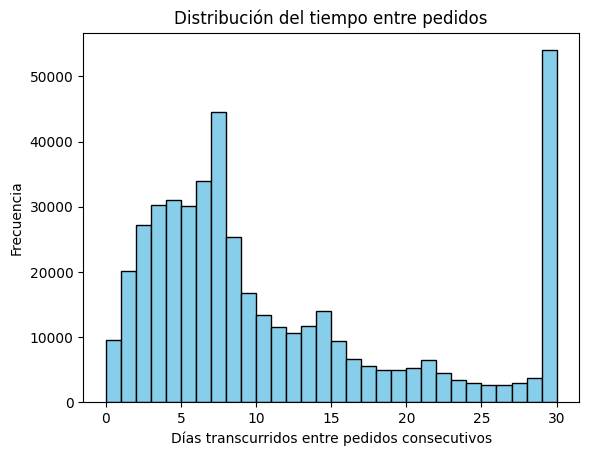

In [40]:
plt.hist(instacart_orders_df['days_since_prior_order']  , bins=30, color='skyblue', edgecolor='black')


plt.xlabel('Días transcurridos entre pedidos consecutivos')
plt.ylabel('Frecuencia')
plt.title('Distribución del tiempo entre pedidos')

min_days_since_prior_order = instacart_orders_df['days_since_prior_order'].min()
max_days_since_prior_order = instacart_orders_df['days_since_prior_order'].max()

print("Valor mínimo de días entre pedidos:", min_days_since_prior_order)
print()
print("Valor máximo de días entre pedidos:", max_days_since_prior_order)

plt.show()



Parece que el día más recurrente para volver a hacer la compra es el día 30. Esto podría deberse al corte de crédito, ya que se observa que la frecuencia de compra disminuye progresivamente los primeros días después de una compra específica, especialmente a partir del día 8. Esta tendencia podría explicarse por la proximidad de la fecha de corte de la tarjeta de crédito.

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

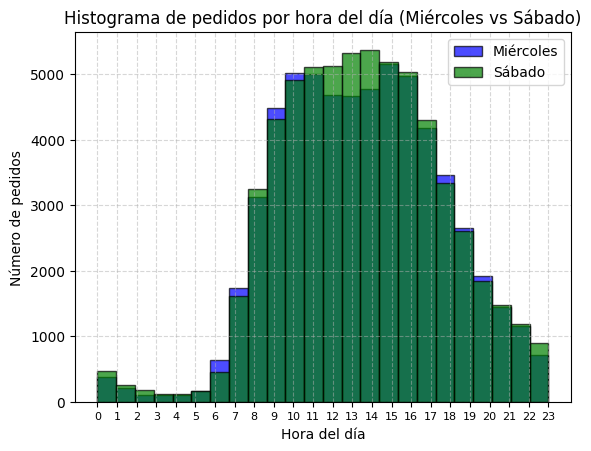

In [41]:
#Miercoles numero de compras a lo largo de todos el dia 

wednesday_orders = instacart_orders_df[instacart_orders_df['order_dow'] == 3]
saturday_orders = instacart_orders_df[instacart_orders_df['order_dow'] == 6]


wednesday_hours = wednesday_orders['order_hour_of_day']
saturday_hours = saturday_orders['order_hour_of_day']

# Crear histogramas
plt.hist(wednesday_hours, bins=24, alpha=0.7, color='blue', label='Miércoles', edgecolor='black')
plt.hist(saturday_hours, bins=24, alpha=0.7, color='green', label='Sábado', edgecolor='black')


plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(range(24), fontsize=8) 
plt.xlabel('Hora del día')
plt.ylabel('Número de pedidos')
plt.title('Histograma de pedidos por hora del día (Miércoles vs Sábado)')
plt.legend()

# Mostrar el gráfico
plt.show()


Parece que hay una diferencia significativa en el comportamiento de las compras entre los días miércoles y sábado, especialmente en el intervalo entre las 12 y las 15 horas. Mientras que el sábado muestra una distribución más constante durante ese período, el miércoles exhibe una curva invertida, lo que sugiere una disminución en las compras durante esas horas en comparación con el resto del día.

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

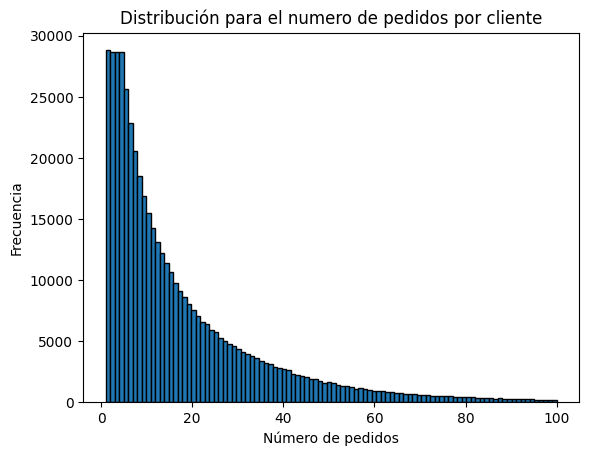

In [42]:


orders_num = instacart_orders_df['order_number']

plt.hist(orders_num, bins=100, edgecolor='black')

plt.xlabel('Número de pedidos')
plt.ylabel('Frecuencia')
plt.title('Distribución para el numero de pedidos por cliente')

plt.show()

Se observa que 1 a 4 pedidos es lo mas común, a partir de los 5 pedidos comienza a decender la frecuencia en la que se piden esa cantidad de pedidos

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [43]:

product_count = order_products_df['product_id'].value_counts()

product_id_list = product_count.index.tolist()

product_id_list_popular = product_id_list[:20]

nombres_popular = products_df[products_df['product_id'].isin(product_id_list_popular)]

nombres_id_popular = nombres_popular[['product_id', 'product_name']]
nombres_id_popular.index = range(1, 21)

print('20 productos mas populares:')
print()
print(nombres_id_popular)

20 productos mas populares:

    product_id              product_name
1         5876             Organic Lemon
2         8277  Apple Honeycrisp Organic
3        13176    Bag of Organic Bananas
4        16797              Strawberries
5        21137      Organic Strawberries
6        21903      Organic Baby Spinach
7        22935      Organic Yellow Onion
8        24852                    Banana
9        24964            Organic Garlic
10       26209                     Limes
11       27845        Organic Whole Milk
12       27966       Organic Raspberries
13       28204        Organic Fuji Apple
14       39275       Organic Blueberries
15       40706    Organic Grape Tomatoes
16       45007          Organic Zucchini
17       47209      Organic Hass Avocado
18       47626               Large Lemon
19       47766           Organic Avocado
20       49683            Cucumber Kirby


Usando el df order_products ordene los datos y saque las id de los 20 productos mas comprados para posteriormente ponerlos en una lista, después hice un df basado en el products_df para que unicamente las filas en las que estuviesen los id's que estaban en la lista con isin(), por ultimo imprimí de ese df el nombre y la id de los 20 mas populares y quite el indice del df de donde se extrajo

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

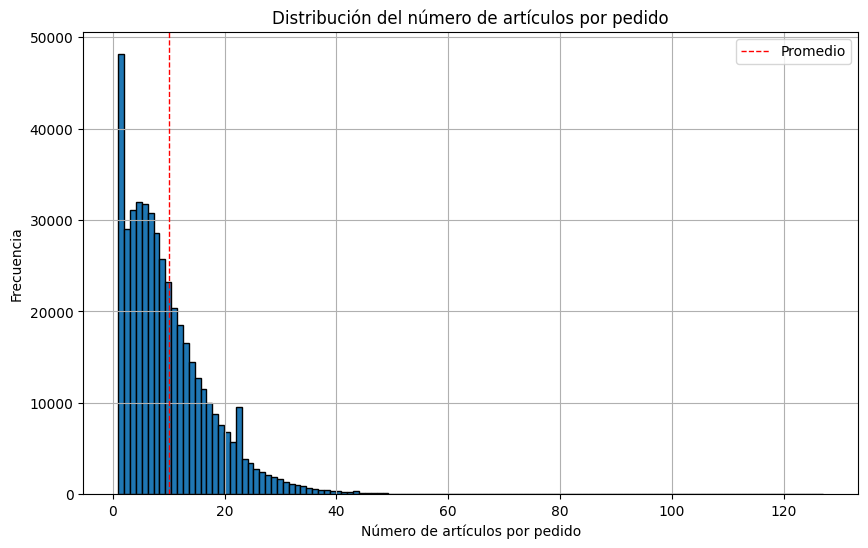

El promedio por pedido es:  10.098983215049127 articulos


In [58]:
num_articulos_por_pedido = order_products_df.groupby('order_id')['product_id'].count()
promedio_articulos_por_pedido = num_articulos_por_pedido.mean()

plt.figure(figsize=(10, 6))
plt.hist(num_articulos_por_pedido, bins=120, edgecolor='black')
plt.axvline(promedio_articulos_por_pedido, color='red', linestyle='dashed', linewidth=1, label='Promedio')
plt.xlabel('Número de artículos por pedido')
plt.ylabel('Frecuencia')
plt.title('Distribución del número de artículos por pedido')
plt.legend()
plt.grid(True)
plt.show()

print('El promedio por pedido es: ', promedio_articulos_por_pedido, 'articulos')



Normalmente el cliente suele comprar 10 artículos por pedido

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [82]:

id_products_reordenados = order_products_df[order_products_df['reordered'] == 1]

id_principales = id_products_reordenados['product_id'].value_counts()

id_20_principales = id_principales.index.tolist()[:20]

producs_id = products_df[products_df['product_id'].isin(id_20_principales)]

tabla_20_principales = producs_id['product_name']

tabla_20_principales.index = id_20_principales

tabla_20_principales = tabla_20_principales.rename_axis('product_id')


print(tabla_20_principales)

product_id
24852               Organic Lemon
13176    Apple Honeycrisp Organic
21137      Bag of Organic Bananas
21903                Strawberries
47209        Organic Strawberries
47766        Organic Baby Spinach
27845        Organic Yellow Onion
47626                      Banana
27966              Organic Garlic
16797                       Limes
26209          Organic Whole Milk
22935         Organic Raspberries
24964          Organic Fuji Apple
45007         Organic Blueberries
49683            Organic Zucchini
28204        Organic Hass Avocado
8277                  Large Lemon
39275             Organic Avocado
5876          Organic Half & Half
49235              Cucumber Kirby
Name: product_name, dtype: object


Escribe aquí tus conclusiones

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

Escribe aquí tus conclusiones

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

Escribe aquí tus conclusiones

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

Escribe aquí tus conclusiones

### Conclusion general del proyecto: